In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '/data/ex1data1.txt'
print path
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
print data.head()
print data.describe()

/Users/lvshuo/octopress/source/Coursera Machine Learning Excerise/data/ex1data1.txt
   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


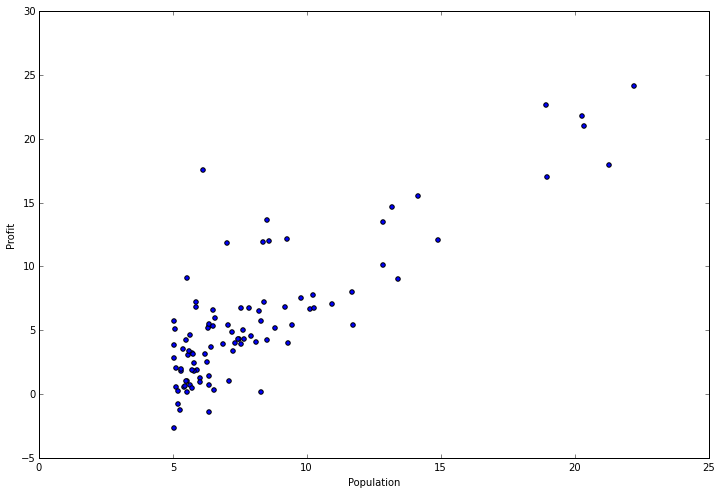

In [3]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))

## Cost Function

In [12]:
def hypothesis(theta, x):
    return np.dot(x, theta)

In [13]:
def cost_function(theta, x, y):
    loss = hypothesis(theta, x) - y
    return np.sum(loss ** 2) / (2 * len(y))

add a column of 1 as x0

In [5]:
data.insert(0, 'X0', 1)

In [11]:
data.head()

,X0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
cols = data.shape[1]
data.shape

(97, 3)

In [7]:
X = data.iloc[:, 0: cols-1]
y = data.iloc[:, cols-1]

print X.head()
print y.head()

   X0  Population
0   1      6.1101
1   1      5.5277
2   1      8.5186
3   1      7.0032
4   1      5.8598
0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


In [8]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [9]:
print theta
print theta.T
print theta.shape
print np.zeros(theta.shape)
print theta.ravel().shape[1]
print (X * theta.T - y)

[[0 0]]
[[0]
 [0]]
(1, 2)
[[ 0.  0.]]
2
[[-17.592    -9.1302  -13.662   ...,  -0.14454  -9.0551   -0.61705]
 [-17.592    -9.1302  -13.662   ...,  -0.14454  -9.0551   -0.61705]
 [-17.592    -9.1302  -13.662   ...,  -0.14454  -9.0551   -0.61705]
 ..., 
 [-17.592    -9.1302  -13.662   ...,  -0.14454  -9.0551   -0.61705]
 [-17.592    -9.1302  -13.662   ...,  -0.14454  -9.0551   -0.61705]
 [-17.592    -9.1302  -13.662   ...,  -0.14454  -9.0551   -0.61705]]


In [10]:
X.shape, y.shape, theta.shape

((97, 2), (1, 97), (1, 2))

compute cost for initial theta [0, 0]

In [11]:
print computeCost(X, y, theta)

3111.05518611


## Gradient Descent

1. Calculate the hypothesis h = X * theta
2. Calculate the loss = h - y and maybe the squared cost (loss^2)/2m
3. Calculate the gradient = X' * loss / m
4. Update the parameters theta = theta - alpha * gradient

In [56]:
def gradient_descent(alpha, x, y, iters):
    # number of training dataset
    m = x.shape[0]
    theta = np.zeros(2)
    cost_iter = []
    for iter in range(iters):
        h_theta = hypothesis(theta, x)
        loss = h_theta - y
        J = np.sum(loss ** 2) / (2 * m)
        cost_iter.append([iter, J])
        # print "iter %s | J: %.3f" % (iter, J)
        gradient = np.dot(x.T, loss) / m
        theta -= alpha * gradient
    return theta, cost_iter

## Generate Sample Data

In [93]:
from sklearn.datasets.samples_generator import make_regression

In [94]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35)

In [95]:
m, n = np.shape(x)
print m, n

100 1


In [96]:
x = np.c_[np.ones(m), x] ## add column value 1 as x0

In [97]:
print np.shape(x)

(100, 2)


In [98]:
alpha = 0.01
theta, cost_iter = gradient_descent(alpha, x, y, 1000)
print theta

[ -2.8484052  43.202331 ]


## Plot result

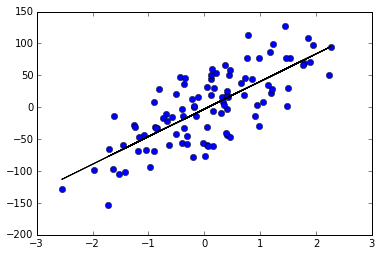

In [99]:
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1] * x
plt.plot(x[:, 1], y, 'o')
plt.plot(x, y_predict, 'k-')

In [102]:
cost_iter = np.array(cost_iter)
print cost_iter

[[  0.00000000e+00   1.64741003e+03]
 [  1.00000000e+00   1.62825972e+03]
 [  2.00000000e+00   1.60949757e+03]
 ..., 
 [  9.97000000e+02   6.99300355e+02]
 [  9.98000000e+02   6.99300355e+02]
 [  9.99000000e+02   6.99300355e+02]]


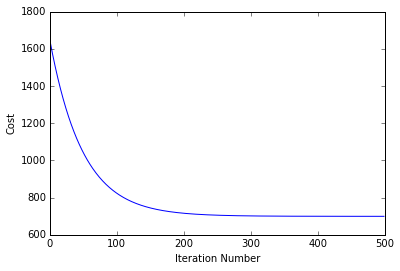

In [105]:
plt.plot(cost_iter[:500, 0], cost_iter[:500, 1])
plt.xlabel("Iteration Number")
plt.ylabel("Cost")

## Homework

In [152]:
import os
path = os.getcwd() + '/data/ex1data1.txt'
print path
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
print data.head()
print data.describe()

/Users/lvshuo/octopress/source/Coursera Machine Learning Excerise/data/ex1data1.txt
   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


In [153]:
data.insert(0, 'X0', 1)
cols = data.shape[1]
X = data.iloc[:, 0: cols-1]
y = data.iloc[:, cols-1]

In [154]:
X = np.array(X.values)
y = np.array(y.values)

In [155]:
print type(y)

<type 'numpy.ndarray'>


In [156]:
print type(y)

<type 'numpy.ndarray'>


In [157]:
alpha = 0.01
theta_new, cost_home = gradient_descent(alpha, X, y, 1000)
print theta_new

[-3.24140214  1.1272942 ]


In [165]:
print theta_new[1]

1.12729420243


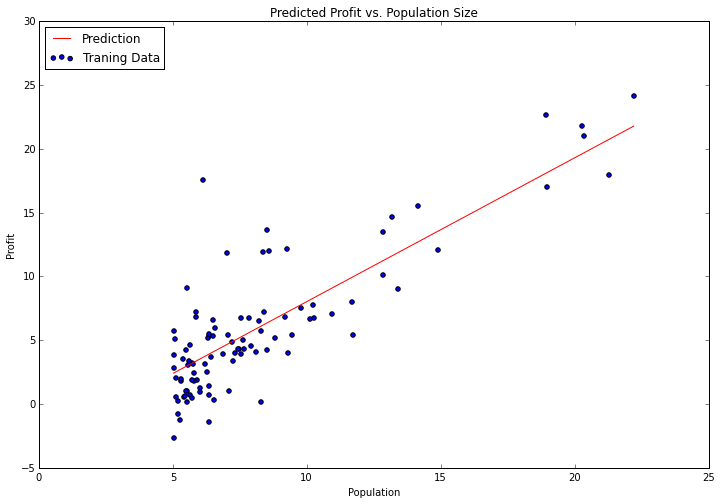

In [166]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta_new[0] + theta_new[1] * x

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

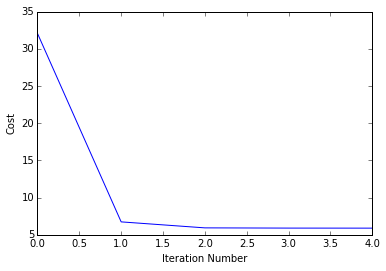

In [161]:
cost_home = np.array(cost_home)
# plot cost trend
plt.plot(cost_home[:5, 0], cost_home[:5, 1])
plt.xlabel("Iteration Number")
plt.ylabel("Cost")